# **Matrix Multiplication**

### **Multiplying matrices**

* Multiple matrices $A, B$
  - $AB[i, j] = \Sigma^{n-1}_{k=0}A[i, k]B[k, j]$
* Dimensions must be compatible
  - $A: m \times n, B: n \times p$
  - $AB: m \times p$
* Computing each entry in $AB$ is $O(n)$
* Overall, computing $AB$ is $O(mnp)$
* Matrix multiplication is associative
  - $ABC = (AB)C = A(BC)$
  - Brackting does not change answer
  - ... but can affect the complexity
* Let $A:1 \times 100, B: 100 \times 1, C: 1 \times 100$
* Computing $A(BC)$
  - $BC: 100 \times 100$, takes $100.1.100 = 10000$ steps to compute
  - $A(BC): 1 \times 100$, takes $1.100.100 = 10000$ steps to compute
* Computing $(AB)C$
  - $AB: 1 \times 1$, takes $1.100.1 = 100$ steps to compute
  - $(AB)C: 1 \times 100$, takes $1.1.100 = 100$ steps to compute
* $20000$ steps vs $200$ steps
-------------------------------------------------------------------------------
* Given $n$ matrices $M_0: r_0 \times c_0$, $M_1: r_1 \times c_1, ..., M_{n-1}: r_{n-1} \times c_{n-1}$
  - Dimensions match: $r_j = c_{j-1}, 0 \lt j \lt n$
  - Product $M_0.M_1...M_{n-1}$ can be computed
* Find the optimal order to compute the product
  - Multiple 2 matrices at a time
  - Bracket the expression optimally

### **Inductive Structure**

* Final step combines two subproducts $(M_0.M_1...M_{k-1}).(M_k.M_{k+1}...M_{n-1})$ for some $0 \lt k \lt n$
* First factor is $r_0 \times c_{k-1}$, second is $r_k \times c_{n-1}$, where $r_k = c_{k-1}$
* Let $C(0, n-1)$ denote the overall cost
* Final multiplication is $O(r_0r_kc_{n-1})$
* Inductively, costs of factors are $C(0, k-1)$ and $C(k, n-1)$
* $C(0,n-1) = C(0,k-1)+C(k,n-1)+r_0r_kc_{n-1}$
* Which $k$ should we choose?
  - Try all and choose the minimum!
* Subproblems?
  * $M_0.M_1...M_{k-1}$ would decompose as $(M_0...M_{j-1}).(M_j...M_{k-1})$
  * Generic subproblem is $M_j.M_{j+1}...M_k$
* $C(j,k) = min_{j \lt l \leq k}[C(j,l-1)+C(l,k)+r_jr_lc_k]$
* Base case: $C(j,j)=0$ for $0 \leq j \lt n$

### **Subproblem dependency**

* Compute $C(i,j),0 \leq i,j \lt n$
  - Only for $i \leq j$
  - Entries above main diagonal

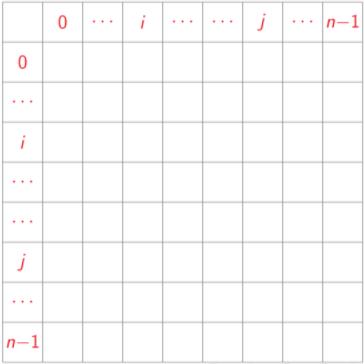

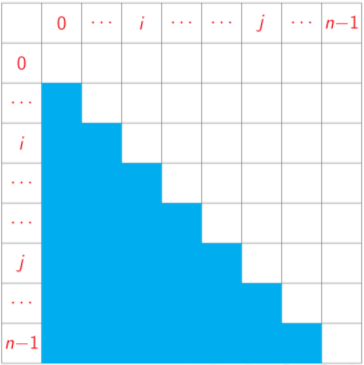

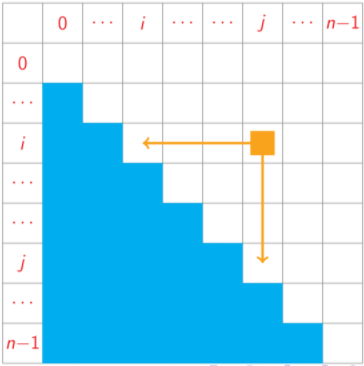

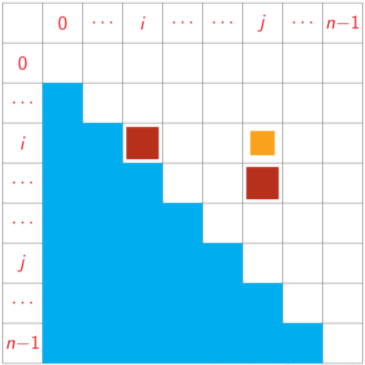

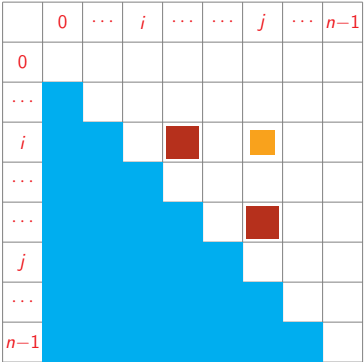

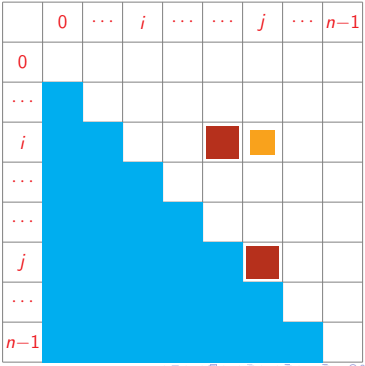

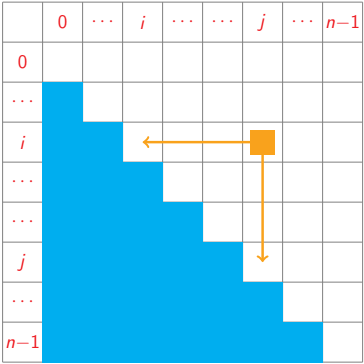

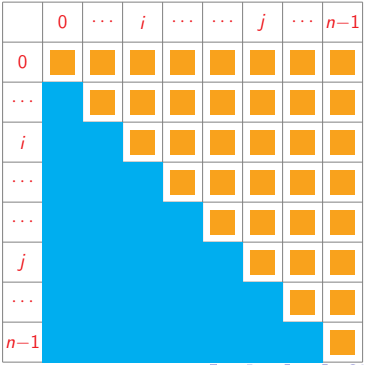

* $C(i,j)$ depends on $C(i,k-1),C(k,j)$ for every $i \lt k \leq j$
  - $O(n)$ dependencies per entry, unlike LCW, LCS and ED
* Diagonal entries are base case
* Fill matrix by diagonal, from main diagonal

### **Implementation**

In [ ]:
def C(dim):
  # dim: dimension matrix,
  #      entries are pairs (r_i, c_i)
  import numpy as np
  n = dim.shape[0]
  C = np.zeros((n, n))

  for i in range(n):
    C[i, i] = 0
  
  for diff in range(1, n):
    j = i + diff
    C[i, j] = C[i, i] + C[i + 1, j] + dim[i][0] * dim[i + 1][0] * dim[j][1]

    for k in range(i + 1, j + 1):
      C[i, j] = min(C[i, j], C[i, k - 1] + C[k, j] + dim[i][0] * dim[k][0] * dim[j][1])
  
  return C[0, n - 1]

**Complexity**

* We have to fill a table of size $O(n^2)$
* Filling each entry takes $O(n)$
* Overall, $O(n^3)$